# <span style="color:purple;">**Chance of College Admission with Multiple Regression**

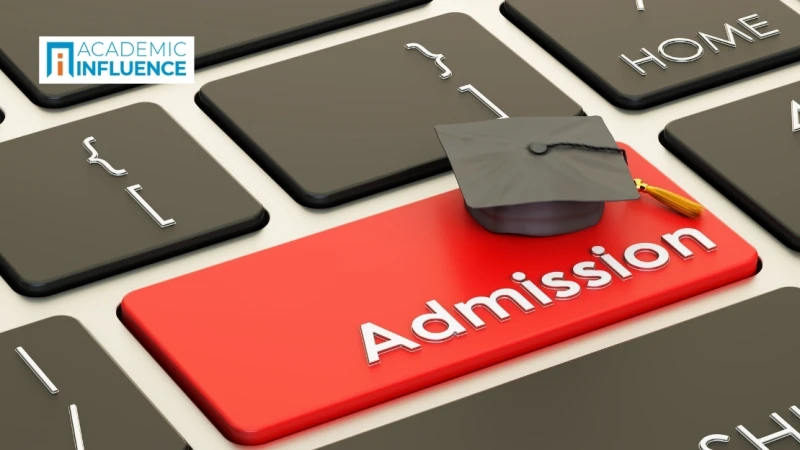

## <span style="color:purple;">**Introduction**

#### *The objective of this analysis is to explore the most important factors for a student to get into graduate school and to select the most accurate model to predict a student’s chances of gaining admission into Graduate School.*

#### *The data that I will be using is the [Admission Chances](https://github.com/YBI-Foundation/Dataset/blob/main/Admission%20Chance.csv) dataset that can be found on Github.*

In [1]:
# step 1. import library
import pandas as pd

In [2]:
# step 2. read data
df= pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Admission%20Chance.csv')

In [3]:
df.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No          400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4    SOP               400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
df.describe()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
# step 3. Define Y and X
df.columns

Index(['Serial No', 'GRE Score', 'TOEFL Score', 'University Rating', ' SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
y= df['Chance of Admit ']
x= df[['Serial No', 'GRE Score', 'TOEFL Score', 'University Rating', ' SOP',
       'LOR ', 'CGPA', 'Research']]

In [8]:
#step 4. Train test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size= 0.7,random_state= 2529)
x_train

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
381,382,319,105,3,3.0,3.5,8.67,1
48,49,321,110,3,3.5,5.0,8.85,1
20,21,312,107,3,3.0,2.0,7.90,1
296,297,310,107,3,3.5,3.5,8.67,0
373,374,321,109,3,3.0,3.0,8.54,1
...,...,...,...,...,...,...,...,...
72,73,321,111,5,5.0,5.0,9.45,1
228,229,318,112,3,4.0,3.5,8.67,0
316,317,298,101,2,1.5,2.0,7.86,0
50,51,313,98,3,2.5,4.5,8.30,1


In [9]:
# check shape of train and test sample
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((280, 8), (120, 8), (280,), (120,))

In [10]:
# step 5. Select Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [11]:
# step 6. Train or Fit Model
model.fit(x_train,y_train)

LinearRegression()

In [12]:
model.intercept_

-1.3491869284562994

In [13]:
model.coef_

array([ 0.00018075,  0.00217672,  0.00396487,  0.00836627, -0.00080004,
        0.02030329,  0.09551552,  0.01979659])

In [14]:
# step 7. Predict model
y_pred = model.predict(x_test)
y_pred

array([0.71638511, 0.75610311, 0.68760789, 0.68124699, 0.56927168,
       0.91423484, 0.90562753, 0.72569757, 0.79088749, 0.59675934,
       0.59489304, 0.80774252, 0.54572472, 0.77132503, 0.8737274 ,
       0.66751677, 0.61934136, 0.67447953, 0.73484064, 0.84425246,
       0.62922545, 0.86090216, 0.82814605, 0.9151533 , 0.68755296,
       0.63544487, 0.6134806 , 0.57723203, 0.51557048, 0.61715529,
       0.52595747, 0.76388331, 0.69695739, 0.75953801, 0.62049587,
       0.53097396, 0.40200383, 0.87065079, 0.92286173, 0.78952969,
       0.71932513, 0.73604218, 0.70278395, 0.90704   , 0.80062706,
       0.81781888, 0.91769447, 0.86667679, 0.58887763, 0.48098577,
       0.62564848, 0.61917228, 0.8041983 , 0.46620308, 0.71182598,
       0.74243792, 0.69141228, 0.63484399, 0.82789223, 0.6680648 ,
       0.64158042, 0.93553342, 0.66537654, 0.65115639, 0.73074156,
       0.69630576, 0.59954454, 0.91516057, 0.57456458, 0.90601273,
       0.5702746 , 0.92658714, 0.62468054, 0.71689836, 0.52505

In [15]:
# step 8. Model Accuracy
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)

0.07400437276133896